#**Cleanig Data**
>Jorgue Triana  Cod 614221021
>Nataly Neira   Cod 614212782

In [1]:
import pandas as pd
import numpy as np
import  copy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In the field of Machine Learning, to produce better models, discretization of continuous data is commonly used, because many machine learning techniques are applied to nominal, categorized variables, but in real life, many data are collected as continuous variables.

**Discretization** is the process of putting values into buckets so that there are a limited number of possible states.(Microsoft,204) The buckets themselves are treated as ordered and discrete values. You can discretize both numeric and string columns.

There are several methods that you can use to discretize data. you can discretize the data in the columns to enable the use of the algorithms to produce a mining model.

 Another way to refer to this process is **Binning**, which refers to the process of dividing a continuous range of values into discrete intervals or "bins." These bins represent intervals or categories and are used to group data into broader classes.


##**Categorical features**:

>Categorical features are features that take on discrete values only. So whenever we see a categorical feature we mean values that are taken as a verbal description, some examples could be ranking the height of a pet as: big, medium or small. In other cases there are other categories that describe those things as rankings, yes or no answers, etc.

##**Encode:**
The encode is the practice to assign a computer legible format to values that were given in a human legible format, that practice could convert text in byte, discrete values in numeric values.

Given a categorical feature we must start converting those discrete values we got into whilst numbers without losing the information that was encoded.

##**Categories of encoding.**

1.   **Ordinal categorical features:** There is an inherent order or relationship between the categories in this particular feature e.g size (small, big, medium), age groups and so on.
2.   **Nominal categorical features:** There’s no sensible order between the categories of the feature e.g countries, cities, names, etc.

>There are some techniques to categorize discrete values, some of them are:


###***One-hot encoding***
>One-hot encoding stands as one of the utmost efficacious schemes for encoding
nominal categorical attributes. This approach spawns a novel binary column on behalf of each class within the native column. Ideally, we discard one of said columns to circumvent collinearity, henceforth, a trait with K unique classes shall yield K-1 supplementary columns in the data.

>A downside to this method is that it expands feature space when a feature has many unique categories or there many categorical features in the data.

####***Observacion:***
The categorization is performed only with string-type data and randomly assigns n-1 categories.

In [2]:
data = pd.DataFrame({
    'Color': ['Rojo', 'Verde', 'Azul', 'Rojo', 'Verde'],
    'Género': ['Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino'],
    'Tipo': ['A', 'B', 'A', 'C', 'B'],
    'Edad': [25, 30, 22, 35, 28]
})


print("DataFrame Original:")
print(data)

# Aplicar get_dummies para convertir variables categóricas en variables dummy
data_despues = pd.get_dummies(data, drop_first= True)


print("\nDataFrame después de get_dummies:")
print(data_despues)

DataFrame Original:
   Color     Género Tipo  Edad
0   Rojo  Masculino    A    25
1  Verde   Femenino    B    30
2   Azul  Masculino    A    22
3   Rojo   Femenino    C    35
4  Verde  Masculino    B    28

DataFrame después de get_dummies:
   Edad  Color_Rojo  Color_Verde  Género_Masculino  Tipo_B  Tipo_C
0    25           1            0                 1       0       0
1    30           0            1                 0       1       0
2    22           0            0                 1       0       0
3    35           1            0                 0       0       1
4    28           0            1                 1       1       0


### ***Frequency/count encoding***
>This technique is highly efficacious as well. It imposes hierarchy upon nominal categorical attributes founded on their incidence within the feature. It bears great semblance to count encoding given that the latter can assume any numerical value whereas frequency encoding gets normalized between 0 and 1.

In [3]:
def freq_enc(df, cols):# Frecuency encoding
   for col in cols:
        df[col] = df[col].map(round(df[col].value_counts() / len(df), 4))
   return df


def count_enc(df, cols): # count encoding
    for col in cols:
        df[col]= df[col].map(round(df[col].value_counts()))
    return df


cols=data.columns
print("DataFrame Original:")
print(data)

# Aplicar codificación de frecuencia y de conteo
data_encoded_freq = freq_enc(data.copy(), cols)
data_encoded_count = count_enc(data.copy(), cols)

# Mostrar los DataFrames después de la codificación
print("\nDataFrame después de codificación de frecuencia:")
print(data_encoded_freq)

print("\nDataFrame después de codificación de conteo:")
print(data_encoded_count)

DataFrame Original:
   Color     Género Tipo  Edad
0   Rojo  Masculino    A    25
1  Verde   Femenino    B    30
2   Azul  Masculino    A    22
3   Rojo   Femenino    C    35
4  Verde  Masculino    B    28

DataFrame después de codificación de frecuencia:
   Color  Género  Tipo  Edad
0    0.4     0.6   0.4   0.2
1    0.4     0.4   0.4   0.2
2    0.2     0.6   0.4   0.2
3    0.4     0.4   0.2   0.2
4    0.4     0.6   0.4   0.2

DataFrame después de codificación de conteo:
   Color  Género  Tipo  Edad
0      2       3     2     1
1      2       2     2     1
2      1       3     2     1
3      2       2     1     1
4      2       3     2     1


##***Target mean encoding***
>The conceptualization underpinning this approach is actually rather ingenious. This technique boasts an exceptionally unique attribute in the sense that it utilizes the target variable within its calculation, which is seldom encountered in machine learning procedures. Each class within the categorical predictor gets supplanted by the target column’s mean strictly for said category.

>it poses the risk of overfitting if it incorporates excessive details pertaining to the target variable. Hence, prior to deployment, one must ascertain that the categorical attribute does not express robust correlation with the response column.


In [4]:
data['Target'] = [5, 2, 1, 1, 10]
target_col = 'Target'

def target_mean_enc(df, cols, target_col):
    mean_holder = {}
    for col in cols:
        col_mean = {}
        cat = list(df[col].unique())
        for i in cat:
            data = df[df[col] == i]
            mean = np.mean(data[target_col])
            col_mean[i] = mean
        mean_holder[col] = col_mean
    return mean_holder


print("DataFrame Original:")
print(data)

# Aplicar la codificación de media del target
mean_encoding_result = target_mean_enc(data.copy(), cols, target_col)


print("\nResultado de la codificación de media del target:")
print(mean_encoding_result)

DataFrame Original:
   Color     Género Tipo  Edad  Target
0   Rojo  Masculino    A    25       5
1  Verde   Femenino    B    30       2
2   Azul  Masculino    A    22       1
3   Rojo   Femenino    C    35       1
4  Verde  Masculino    B    28      10

Resultado de la codificación de media del target:
{'Color': {'Rojo': 3.0, 'Verde': 6.0, 'Azul': 1.0}, 'Género': {'Masculino': 5.333333333333333, 'Femenino': 1.5}, 'Tipo': {'A': 3.0, 'B': 6.0, 'C': 1.0}, 'Edad': {25: 5.0, 30: 2.0, 22: 1.0, 35: 1.0, 28: 10.0}}


##***Ordered integer encoding***
>This method is very similar to target mean encoding except that it goes a step further to rank the categories based on the magnitude of their target mean.

In [5]:
def ordered_interger_encoder(data, cols, target_col):
    mean_holder= {}
    for col in cols:
        labels =  list(enumerate(data.groupby([col])[target_col].mean().sort_values().index))
        col_mean= {value:order for order,value in labels}
        mean_holder[col]= col_mean
    return mean_holder

print("DataFrame Original:")
print(data)

# Aplicar la codificación de media del target
interger_encoding_result=ordered_interger_encoder(data.copy(), cols, target_col)


print("\nResultado de la codificación de enteros ordenados:")
print(interger_encoding_result)


DataFrame Original:
   Color     Género Tipo  Edad  Target
0   Rojo  Masculino    A    25       5
1  Verde   Femenino    B    30       2
2   Azul  Masculino    A    22       1
3   Rojo   Femenino    C    35       1
4  Verde  Masculino    B    28      10

Resultado de la codificación de enteros ordenados:
{'Color': {'Azul': 0, 'Rojo': 1, 'Verde': 2}, 'Género': {'Femenino': 0, 'Masculino': 1}, 'Tipo': {'C': 0, 'A': 1, 'B': 2}, 'Edad': {22: 0, 35: 1, 30: 2, 25: 3, 28: 4}}


##***Leave one out encoding***

>This encoding method bears great similarity to target mean encoding, with the exception that it computes the target average omitting the particular category during each iteration. Hence, the target mean gets encoded for every class while ignoring that class's contribution to the overall mean, thereby reducing overfitting. Nonetheless, regular target means derived utilizing the entire training set still get employed to code novel levels in incoming test partition observations.


In [6]:
def leave_one_out_means(df,cols,target):
  for  i in cols:
    leave_one_out_means = df.groupby(i)[target].transform(lambda x: (x.sum() - x) / (x.count() - 1))
    df[i] = leave_one_out_means
  return df


print("DataFrame Original:")
print(data)

LOO=leave_one_out_means(data.copy(),cols,'Target')

print("\nResultado de la codificación de media del target dejando uno fuera:")
print(LOO)

DataFrame Original:
   Color     Género Tipo  Edad  Target
0   Rojo  Masculino    A    25       5
1  Verde   Femenino    B    30       2
2   Azul  Masculino    A    22       1
3   Rojo   Femenino    C    35       1
4  Verde  Masculino    B    28      10

Resultado de la codificación de media del target dejando uno fuera:
   Color  Género  Tipo  Edad  Target
0    1.0     5.5   1.0   NaN       5
1   10.0     1.0  10.0   NaN       2
2    NaN     7.5   5.0   NaN       1
3    5.0     2.0   NaN   NaN       1
4    2.0     3.0   2.0   NaN      10


##**Weight of evidence encoding**
 This method transform  categorical  columns  by applying the natural logarithm of the ratio of the probability of the event to the probability of the non-event

 >$$ln\left(\frac{p(good)}{p(bad)}\right)$$
  to  each category
 this  method  is  usually  used  to  transform features for a logistic regression  tasks  and is  useful because :

*   ***Interpretability:*** The natural logarithm function is monotonically increasing, so the WoE values will also be monotonically increasing. This makes it easy to interpret the relationship between the predictor variable and the odds of the event occurring. Positive WoE values indicate a positive relationship with the event, while negative values indicate a negative relationship.

*   ***Handling of Zero Probabilities:***Taking the logarithm ensures that if the probability of either the event or the non-event is zero, the WoE will be undefined. This is useful because it avoids issues with dividing by zero or encountering undefined values when calculating the ratio.

*   ***Numerical Stability***: Using the logarithm helps in stabilizing the values, especially when dealing with small probabilities. It transforms the multiplicative relationship into an additive one, making the encoding more stable and robust.

*   ***Alignment with Logistic Regression***: WoE is often used in conjunction with logistic regression. The relationship between the log-odds (logit) in logistic regression and the WoE is straightforward, making it convenient to use both techniques together.






In [7]:
def woe_values(df,cols,target_col):
  for i in cols:
    positive_class_prob = df.groupby(i)[target_col].mean()
    negative_class_prob = 1 - positive_class_prob
    woe_values = pd.Series(
    index=positive_class_prob.index,
    data=np.log(positive_class_prob / negative_class_prob))
    df[i] = df[i].map(woe_values)
  return df
data['Target'] = [0.3, 0.4, 0.8, 0.5, 0.4]

print("DataFrame Original:")
print(data)

WOE=woe_values(data.copy(),cols,'Target')

print("\nResultado de la codificación Peso de la codificación de evidencia:")
print(WOE)

DataFrame Original:
   Color     Género Tipo  Edad  Target
0   Rojo  Masculino    A    25     0.3
1  Verde   Femenino    B    30     0.4
2   Azul  Masculino    A    22     0.8
3   Rojo   Femenino    C    35     0.5
4  Verde  Masculino    B    28     0.4

Resultado de la codificación Peso de la codificación de evidencia:
      Color    Género      Tipo      Edad  Target
0 -0.405465  0.000000  0.200671 -0.847298     0.3
1 -0.405465 -0.200671 -0.405465 -0.405465     0.4
2  1.386294  0.000000  0.200671  1.386294     0.8
3 -0.405465 -0.200671  0.000000  0.000000     0.5
4 -0.405465  0.000000 -0.405465 -0.405465     0.4


##**Label encoding or ordinal encoding**
this  is  a way to rename  the categories  by  simply assign number to each one  based  on the  magnitude we can  infer from them


In [8]:
def ordinal_encoding( df,cols ):
  for  i in cols:
    diccionario= {valor: j+1 for j, valor in enumerate(df[i].unique())}
    df[i]= df[i].map(diccionario)
    print(diccionario)
  return df

Ordinal=ordinal_encoding( data.copy(),cols )
print(Ordinal,)

{'Rojo': 1, 'Verde': 2, 'Azul': 3}
{'Masculino': 1, 'Femenino': 2}
{'A': 1, 'B': 2, 'C': 3}
{25: 1, 30: 2, 22: 3, 35: 4, 28: 5}
   Color  Género  Tipo  Edad  Target
0      1       1     1     1     0.3
1      2       2     2     2     0.4
2      3       1     1     3     0.8
3      1       2     3     4     0.5
4      2       1     2     5     0.4


#**CAPPING. Handling of missing data**
The missing data  are the  values  that  aren't stored for  some columns  in the dataset.  There are  different reasons why are missing, and  we can categorize like.

*  **Missing Completely At Random (MCAR)**:In this case, the value could be missing due to human error, some system/equipment failure, loss of sample, or some unsatisfactory technicalities while recording the values. In this case, there is no relationship between the missing data and any other values observed or unobserved.

*  **Missing At Random (MAR**):Means that the reason for missing values can be explained by variations on which you have complete information, as there is some relationship between the missing data and other values/data.

*  **Missing Not At Random (MNAR)**: Depend on the unobserved data. If there is some structure/pattern in missing data and other observed data cannot explain it. If the missing data does not fall under the MCAR or MAR, it can be categorized as MNAR.




  >Now we are going  to  see different ways  to handle  missing data (Tambolli,2021) using  the  next data set

In [9]:
train_df = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', np.nan, 'Frank', 'Grace', 'Hank', 'Ivy'],
    'Age': [25, 30, np.nan, 22, 28, 35, np.nan, 45, 50, 32],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'F', 'M', 'F', np.nan, 'F'],
    'Salary': [60000, 80000, 75000, np.nan, 90000, 120000, 85000, 'Not available', 110000, 78000],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR', 'Finance', 'IT', 'HR', 'Finance', 'IT']
}

train_df = pd.DataFrame(train_df)

First  we  can count the  missing  values in the  data frame  in aech column

In [10]:
print(train_df.isnull().sum())
print("total in the  DF",train_df.isnull().sum().sum())

Name          1
Age           2
Gender        1
Salary        1
Department    0
dtype: int64
total in the  DF 5


##**Delate**
>Be  very careful  with  this  kind of approach,  because is  not  recommended. If the missing value is of the type  (MNAR), then it should not be deleted.  Otherways  you can  use delate  but  you  have to do  a  very  good  analysis  in each case, so  you dont might end up deleting some useful data from the dataset.

>You  can delete a complete  row   if this  row  has a NaN value, but  we can lose a lot  of  information

In [11]:
df=train_df.copy().dropna(axis=0)
print(df.isnull().sum())

Name          0
Age           0
Gender        0
Salary        0
Department    0
dtype: int64


In [12]:
print("Data  set original \n",train_df)
print("\n Data set modificado\n",df)


Data  set original 
       Name   Age Gender         Salary Department
0    Alice  25.0      F          60000         HR
1      Bob  30.0      M          80000         IT
2  Charlie   NaN      M          75000    Finance
3    David  22.0      M            NaN         IT
4      Eva  28.0      F          90000         HR
5      NaN  35.0      F         120000    Finance
6    Frank   NaN      M          85000         IT
7    Grace  45.0      F  Not available         HR
8     Hank  50.0    NaN         110000    Finance
9      Ivy  32.0      F          78000         IT

 Data set modificado
     Name   Age Gender         Salary Department
0  Alice  25.0      F          60000         HR
1    Bob  30.0      M          80000         IT
4    Eva  28.0      F          90000         HR
7  Grace  45.0      F  Not available         HR
9    Ivy  32.0      F          78000         IT


>We can  also delete an  entire column, but a difference that the last method  we need  to know  which  one  we want  to delete. A candidate  can  be  the one  with  more NaN  values.

In [13]:
df = train_df.copy().drop(['Age'],axis=1)
print(df.isnull().sum())

Name          1
Gender        1
Salary        1
Department    0
dtype: int64


##**Replace**
>we  have a lot  of  different  criteria  for  replace a  value  we  have to do an analysis  of the data  to know  which  one  is  the  more convenient.
>next  we'll see some  examples.
*   ***with an arbitrary value***
*   ***with the mean***
*   ***with the mode***
*   ***with the median***
*   ***forward fill and backward fill***
*   ***Interpolation***



-> **with an arbitrary value**  
>be careful, this guest has to be very educated, because can damage the data.

In [14]:
df=train_df.copy()
df['Salary'] = df['Salary'].fillna(0)
df['Age'] = df['Age'].fillna(0)

print("Data  set original \n",train_df[["Age", "Salary"]])

print("\n Data set  modificado\n ",df[["Age", "Salary"]])

Data  set original 
     Age         Salary
0  25.0          60000
1  30.0          80000
2   NaN          75000
3  22.0            NaN
4  28.0          90000
5  35.0         120000
6   NaN          85000
7  45.0  Not available
8  50.0         110000
9  32.0          78000

 Data set  modificado
      Age         Salary
0  25.0          60000
1  30.0          80000
2   0.0          75000
3  22.0              0
4  28.0          90000
5  35.0         120000
6   0.0          85000
7  45.0  Not available
8  50.0         110000
9  32.0          78000


-->**with the mean**  
>To do this kind of replace you have to trade Outliers first, because this kind of data can modify the mean. remember the mean is
$$  \overline x = \frac{∑_{n=1}^{m}x_n}{m}$$
so any extreme value can alternate the sum

In [15]:
df=train_df.copy()
df['Salary'][7]=np.nan  # cambiar el valor  string para el poder realizar el análisis

df['Age'] =df['Age'].fillna(df['Age'].mean())
df['Salary'] =df['Salary'].fillna(df['Salary'].mean())
print("Data  set original \n",train_df[["Age", "Salary"]])

print("\n Data set  modificado\n ",df[["Age", "Salary"]])

Data  set original 
     Age         Salary
0  25.0          60000
1  30.0          80000
2   NaN          75000
3  22.0            NaN
4  28.0          90000
5  35.0         120000
6   NaN          85000
7  45.0  Not available
8  50.0         110000
9  32.0          78000

 Data set  modificado
        Age    Salary
0  25.000   60000.0
1  30.000   80000.0
2  33.375   75000.0
3  22.000   87250.0
4  28.000   90000.0
5  35.000  120000.0
6  33.375   85000.0
7  45.000   87250.0
8  50.000  110000.0
9  32.000   78000.0


<ipython-input-15-46f6302bca86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'][7]=np.nan  # cambiar el valor  string para el poder realizar el análisis


-> **with the mode**  this kind of replacement is useful to values type string, because dont use numerical calculation and have the statistic value. You  have to do it  column  by column.

In [16]:
df=train_df.copy()
df['Salary'][7]=np.nan  # cambiar el valor  string para el poder realizar el análisis

df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Salary'] = df['Salary'].fillna(df['Salary'].mode()[0])
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
df['Name'] = df['Name'].fillna(df['Name'].mode()[0])

print("Data  set original \n",train_df)

print("\n Data set  modificado\n ",df)

Data  set original 
       Name   Age Gender         Salary Department
0    Alice  25.0      F          60000         HR
1      Bob  30.0      M          80000         IT
2  Charlie   NaN      M          75000    Finance
3    David  22.0      M            NaN         IT
4      Eva  28.0      F          90000         HR
5      NaN  35.0      F         120000    Finance
6    Frank   NaN      M          85000         IT
7    Grace  45.0      F  Not available         HR
8     Hank  50.0    NaN         110000    Finance
9      Ivy  32.0      F          78000         IT

 Data set  modificado
        Name   Age Gender  Salary Department
0    Alice  25.0      F   60000         HR
1      Bob  30.0      M   80000         IT
2  Charlie  22.0      M   75000    Finance
3    David  22.0      M   60000         IT
4      Eva  28.0      F   90000         HR
5    Alice  35.0      F  120000    Finance
6    Frank  22.0      M   85000         IT
7    Grace  45.0      F   60000         HR
8     Hank  50.0 

<ipython-input-16-52817bf69667>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'][7]=np.nan  # cambiar el valor  string para el poder realizar el análisis


->**with the median**  
>It’s better to use the median value for imputation in the case of outliers. remember that this is the middlemost value and it won't be affected by the extreme values.

>  it  doesn't work  with values type  string

In [17]:
df=train_df.copy()
df['Salary'][7]=np.nan  # cambiar el valor  string para el poder realizar el análisis


df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

print("Data  set original \n",train_df[["Age", "Salary"]])

print("\n Data set  modificado\n ",df[["Age", "Salary"]])


Data  set original 
     Age         Salary
0  25.0          60000
1  30.0          80000
2   NaN          75000
3  22.0            NaN
4  28.0          90000
5  35.0         120000
6   NaN          85000
7  45.0  Not available
8  50.0         110000
9  32.0          78000

 Data set  modificado
      Age    Salary
0  25.0   60000.0
1  30.0   80000.0
2  31.0   75000.0
3  22.0   82500.0
4  28.0   90000.0
5  35.0  120000.0
6  31.0   85000.0
7  45.0   82500.0
8  50.0  110000.0
9  32.0   78000.0


<ipython-input-17-1c1cb771b862>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'][7]=np.nan  # cambiar el valor  string para el poder realizar el análisis


-> **forward fill and backward fill**
 >in this  case  we replace  the missing data  with  the previus  or  the  next  value, depending on the case,  sometimes  this  is  better  that  the central tendency values but you  need  to now the nature  of  the  data.

In [18]:
df=train_df.copy()
df['Salary'][7]=np.nan  # cambiar el valor  string para el poder realizar el análisis

df['Age'] = df['Age'].fillna(method='ffill') #llena con el valor  anterior
df['Gender'] = df['Gender'].fillna(method='bfill') #llena con el valor siguiente

print("Data  set original \n",train_df[["Gender","Age"]])

print("\n Data set  modificado\n ",df[["Gender","Age"]])


Data  set original 
   Gender   Age
0      F  25.0
1      M  30.0
2      M   NaN
3      M  22.0
4      F  28.0
5      F  35.0
6      M   NaN
7      F  45.0
8    NaN  50.0
9      F  32.0

 Data set  modificado
    Gender   Age
0      F  25.0
1      M  30.0
2      M  30.0
3      M  22.0
4      F  28.0
5      F  35.0
6      M  35.0
7      F  45.0
8      F  50.0
9      F  32.0


<ipython-input-18-a4f185335bf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'][7]=np.nan  # cambiar el valor  string para el poder realizar el análisis


->**Interpolation**
>This  kind of replacement is  very useful  to preservig relationships present  in the  existing data, also can help to maintain the  statistical properties  it's  very  used  in time-series  data,  but  be careful  with the present of  outlaiers and  noisy  because  we can lose accuracy.

> there are  diferents kinds  of  interpolation:
*   Polynomial
*   Linear
*   Quadratic

you have to analyse the data before to interpolate.


In [19]:
df=train_df.copy()
df['Salary'][7]=np.nan
print("Data  set original \n",train_df["Salary"])

df["Salary"] = pd.to_numeric(df["Salary"], errors='coerce') # convierte los  valores a numerico

df["Salary"] = df["Salary"].interpolate() # es sensible  a los valores numericos

print("\n Data set  modificado\n ",df["Salary"])

Data  set original 
 0            60000
1            80000
2            75000
3              NaN
4            90000
5           120000
6            85000
7    Not available
8           110000
9            78000
Name: Salary, dtype: object

 Data set  modificado
  0     60000.0
1     80000.0
2     75000.0
3     82500.0
4     90000.0
5    120000.0
6     85000.0
7     97500.0
8    110000.0
9     78000.0
Name: Salary, dtype: float64


<ipython-input-19-b63fffd0db4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'][7]=np.nan


#**WINDORIZING**
 **Handling outlaiers with probability distributions**





>But not everything in data cleannig is data handling  missing data
 It is also important to manage the Outlaiers, lets now consider the following dataset (Amaya Cruz,2023),  and lets analyze various ways to handling.

In [20]:
age = [18, 20, 22, 25, 28, 32, 35, 38, 40, 42, 100]

df_ages = pd.DataFrame(age, columns=['Age'])

#**Detection of outliers**

There are a bunch of methods for outlier detection, but some of them are easier to manage using probabilistic distribution.

Normal Distribution: the normal distribution is easier to understand when the concept of a percentile is already clear.

A percentile is a statistical term used to express how a score relates to other scores in the same set. The percentile of values in a dataset that fall below a specific number is a typical way to represent the term. It is calculated as

\begin{equation}
P_x = \frac{x(n + 1)}{100}
\end{equation}

Where:

Px is the $x$the percentile

x is the percentage of data that falls below the percentile value

n is the total number of observations.





Text(0.5, 1.0, 'Boxplot Before Removing Outliers')

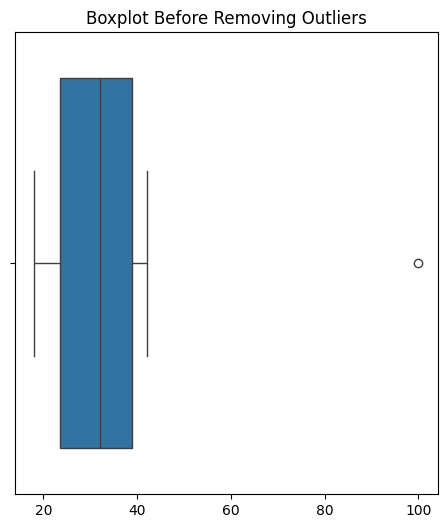

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=age)
plt.title('Boxplot Before Removing Outliers')


**Standard desviation**

The data points that fall below mean-3*(sigma) or above mean+3*(sigma) are outliers, where mean and sigma are the average value and standard deviation of a particular column.

By calculating the deviation of each data point from the mean, the standard deviation may be computed as the square root of variance.

The standard deviation increases with the degree of data dispersion because a bigger deviation exists within the data collection when the data points deviate from the mean.\\

\begin{equation}
\sigma = \sqrt{\dfrac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n - 1}}
\end{equation}

\\
where:

-σ is the standard deviation

-xi is the value of the $i$th data point

-x is the mean of the data set

-n is the number of data points



**Z-score Treatment:**

The Z-Score quantifies the number of standard deviations that separate a given data point from the mean. Outliers are typically defined as data items whose Z-Score is higher than a certain threshold.

libraries as numpy and .scipy.stats are necessary to proceed with this treatment.\\

Mean of dataset is: 36.36363636363637
desviation of dataset is: 21.592392293552784


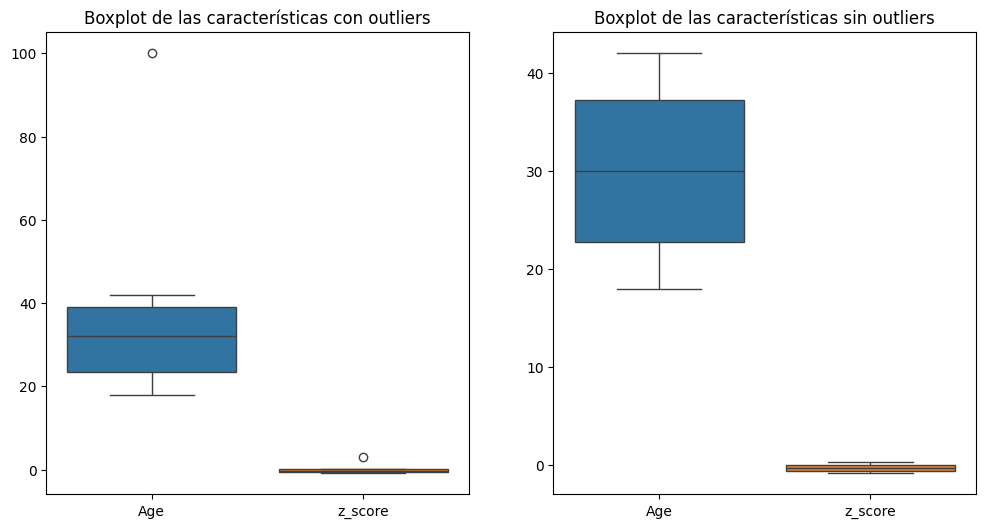

In [22]:
mean = df_ages['Age'].sum() / df_ages['Age'].count() # We calculate the mean of the dataset.
mu = mean
print("Mean of dataset is: {}".format(mu))


sum = 0
for age in df_ages['Age']:
  sum = sum + (age-mu)**2

sigma = np.sqrt(sum/df_ages['Age'].count()) #We calculate sigma of the dataset.
print("desviation of dataset is: {}".format(sigma))

z_score = []
for age in df_ages['Age']: #We calculate z_score for each data point in the dataset.
  z = (age-mu)/sigma
  z_score.append(z)

df_ages['z_score'] = z_score


df_filtered= df_ages[(df_ages['z_score']>-2) & (df_ages['z_score']<2)]
df_filtered.head(11)  # We can see that 100 is an outlier.

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_ages)
plt.title('Boxplot de las características con outliers')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered)
plt.title('Boxplot de las características sin outliers')

plt.show()




**A symmetric:**




Symmetric interquartile range (IQR) outlier detection uses the IQR method to identify data points that are significantly above or below the median. IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the data set.

Here is a basic description of the process:

Calculate Quartiles: Calculates the first quartile (Q1) and third quartile (Q3) of a data set.
IQR Calculation: Subtract Q1 from Q3 to get the interquartile range (IQR).
Define thresholds: Define upper and lower outlier limits. These limits are usually set at a certain amount of IQR of Q1 and Q3. In symmetric IQR proximity, the upper and lower limits of Q1 and Q3 are equidistant.
Identification of outliers: All data points outside these limits are considered outliers.
Here are more detailed step-by-step instructions.

Calculate quartiles (Q1 and Q3).

Sort the data points in ascending order. Find the median value of the data set
, i.e. Q2.
Q1 is the median value of the bottom half of the data set (data points below Q2).
Q3 is the median value of the top half of the data set (data points above Q2).
Calculate IQR:

IQR = Q3 - Q1
Threshold definition:

Upper limit: Q3 + k * IQR
Lower limit: Q1 - k * IQR
('k' is a constant, typically for medium 1.5 or 3)
Identification of outliers:

Data points above the upper limit or below the lower limit are considered outliers.
The choice of the constant 'k' determines how strict the outlier detection is. The larger 'k' is, the fewer outliers will be detected, and the smaller 'k' is, the more outliers will be detected.

Keep in mind that while the symmetric IQR method is useful and widely used, it has some limitations, especially in cases where the data distribution is not symmetric. In such cases, more advanced methods like modified Z-score or machine learning-based anomaly detection algorithms may be more appropriate.


Original data set:
 [18, 20, 22, 25, 28, 32, 35, 38, 40, 42, 100]

Outliers detected:
 [100]

Data set without outliers:
 [18, 20, 22, 25, 28, 32, 35, 38, 40, 42]


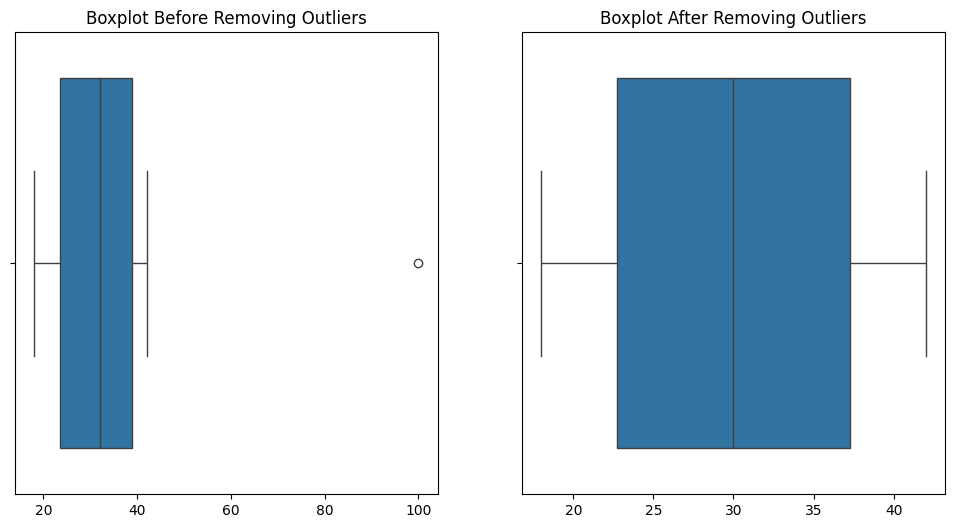

In [23]:
age = [18, 20, 22, 25, 28, 32, 35, 38, 40, 42, 100]

# Calculate quartiles and IQR
Q1 = int((len(age)+1)/4)
Q1 = age[Q1-1]

Q3 = int(3*(len(age)+1)/4)
Q3 = age[Q3-1]

IQR = Q3 - Q1

# Define lower and upper thresholds
threshold_low = Q1 - 1.5 * IQR
threshold_high = Q3 + 1.5 * IQR

# Identify outliers
outliers = [val for val in age if val < threshold_low or val > threshold_high]

# Create a new list without outliers
age_no_outliers = [val for val in age if val >= threshold_low and val <= threshold_high]

print("Original data set:\n", age)
print("\nOutliers detected:\n", outliers)
print("\nData set without outliers:\n", age_no_outliers)

# Plot boxplots before and after removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=age)
plt.title('Boxplot Before Removing Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=age_no_outliers)
plt.title('Boxplot After Removing Outliers')

plt.show()


**Tukey's Fence:**

Could be a strategy utilized for exception location based on the interquartile extent (IQR), which may be a degree of factual scattering. It is named after the American mathematician John Tukey, who presented it.

Here's a point by point clarification of Tukey's Fence strategy:

Calculate Quartiles (Q1 and Q3):

Orchestrating the information focuses on climbing arrangements.
Discover the middle of the dataset, which is Q2.
Q1 is the middle of the lower half of the dataset (information focuses underneath Q2).
Q3 is the middle of the upper half of the dataset (information focuses over Q2).
Calculate Interquartile Extend (IQR):

IQR = Q3 - Q1
Characterize Upper and Lower Bounds (Wall):

Upper Bound (Upper Fence):
Q3 + k * IQR
Lower Bound (Lower Fence):
Q1 - k * IQR
(where 'k' may be a steady, ordinarily set to 1.5 or 3)
Distinguish Exceptions:
Any information point over the upper fence or underneath the lower fence is considered an exception.
The basis behind Tukey's Fence is that it is based on the spread of the center 50% of the information, which is less sensitive to extraordinary values compared to strategies that utilize the cruel and standard deviation. By utilizing the IQR to characterize the run inside which most of the information lies, Tukey's Fence is vigorous against skewed dispersions and exceptions which will influence the cruel and standard deviation excessively.
Choosing an esteem for 'k' depends on the level of affectability craved for exception location. A littler 'k' comes about in a more strict exception location, whereas a bigger 'k' permits for more exceptions to be recognized.


Original data set:
 [18, 20, 22, 25, 28, 32, 35, 38, 40, 42, 100]

Outliers detected using Tukey's Fence:
 [100]

Data set without outliers using Tukey's Fence:
 [18, 20, 22, 25, 28, 32, 35, 38, 40, 42]


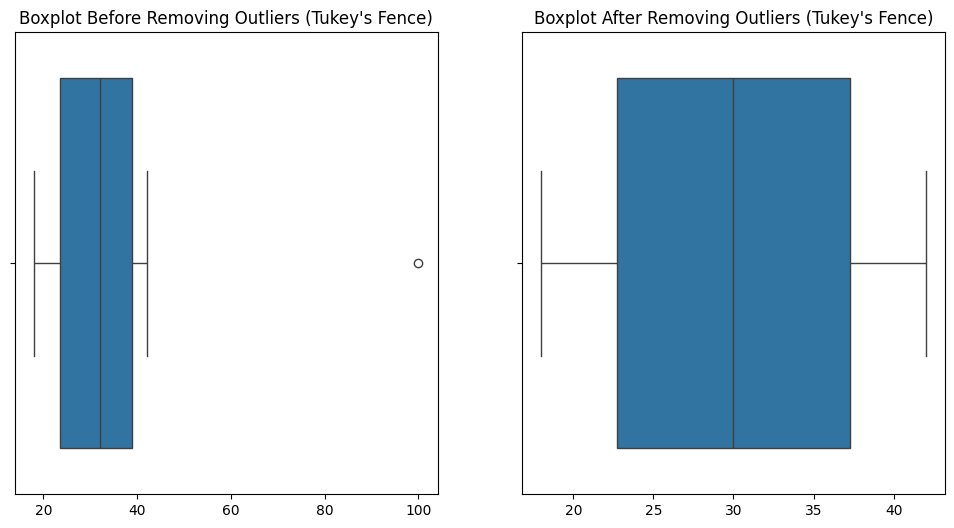

In [24]:
# Data set
age = [18, 20, 22, 25, 28, 32, 35, 38, 40, 42, 100]

# Calculate quartiles and IQR
Q1 = int((len(age)+1)/4)
Q1 = age[Q1-1]

Q3 = int(3*(len(age)+1)/4)
Q3 = age[Q3-1]

IQR = Q3 - Q1

# Define Tukey's Fence thresholds
tukey_threshold_low = Q1 - 1.5 * IQR
tukey_threshold_high = Q3 + 1.5 * IQR

# Identify outliers using Tukey's Fence
outliers_tukey = [val for val in age if val < tukey_threshold_low or val > tukey_threshold_high]

# Create a new list without outliers
age_no_outliers_tukey = [val for val in age if val >= tukey_threshold_low and val <= tukey_threshold_high]

print("Original data set:\n", age)
print("\nOutliers detected using Tukey's Fence:\n", outliers_tukey)
print("\nData set without outliers using Tukey's Fence:\n", age_no_outliers_tukey)

# Plot boxplots before and after removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=age)
plt.title('Boxplot Before Removing Outliers (Tukey\'s Fence)')

plt.subplot(1, 2, 2)
sns.boxplot(x=age_no_outliers_tukey)
plt.title('Boxplot After Removing Outliers (Tukey\'s Fence)')

plt.show()


#**TITANIC 🚢 ejemplo practico**

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


> The goal for this project was to intensely clean as much of the two datasets given(test and train set), whilst fitting it with multiple models for analysis. Missing data that was cleaned,scaled and imputed. The explanations are done straight to the point with clear and explanatory text.🚢

In [26]:
#!pip install lazypredict

## Import libraries🚢

In [27]:
# Visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

<ipython-input-27-680413741eda>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

In [28]:
train_data = pd.read_csv("train.csv")
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [30]:
test_data = pd.read_csv("test.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## before cleaning, we shall do data exploration 🚢

relationship with categorical variables

We can already see that there is one outlier with person that survived with an overwhelming fare that is around 500.

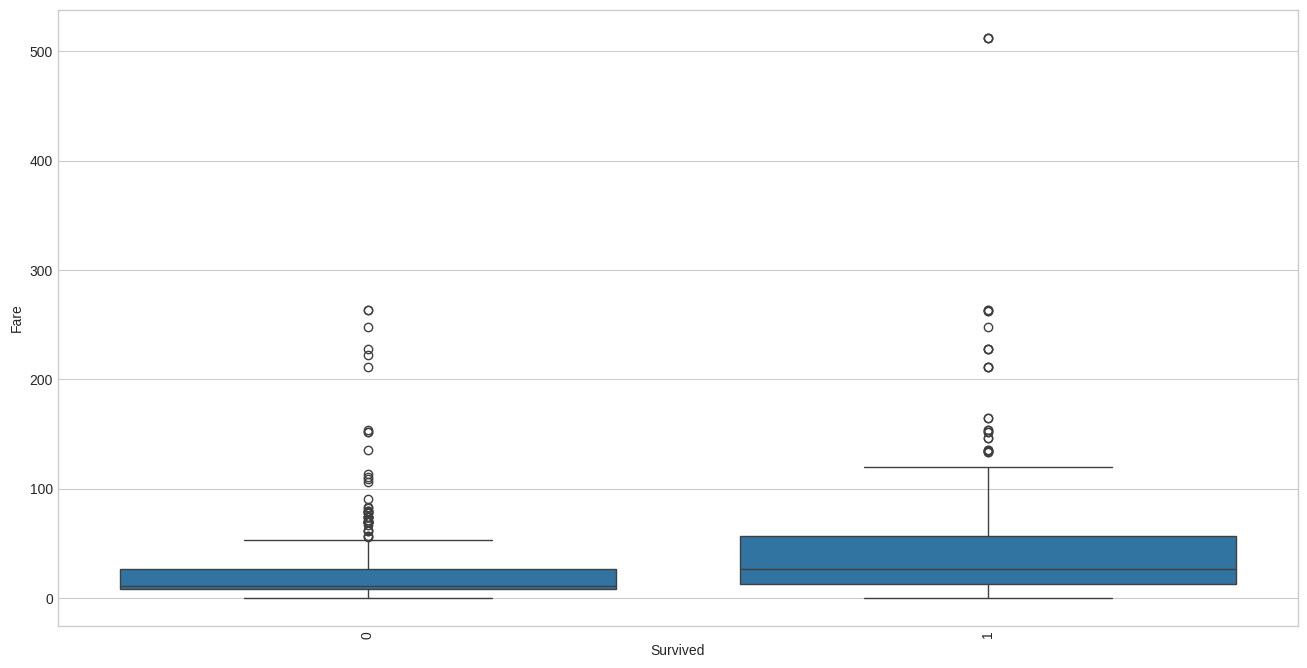

In [32]:
data = pd.concat([train_data['Survived'], train_data['Fare']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=train_data['Survived'], y=train_data['Fare'], data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

its true to say and confirms that there is one extreme outlier that needs to be fixed.

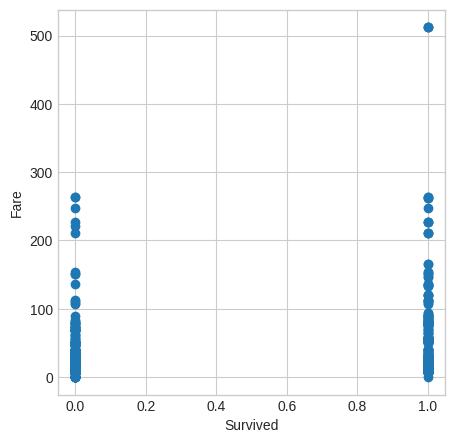

In [33]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(train_data['Survived'],train_data['Fare'])
ax.set_xlabel('Survived')
ax.set_ylabel('Fare')
plt.show()

## Outlier detected as fare > 500 🚢
both test and train data have fare outliers

In [34]:
train_data[train_data['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [35]:
test_data[test_data['Fare'] > 500]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


this will make it easier if all the fares that are 512.3292 are replaced by 7.25 and removed.

In [36]:
#do it for both sets
train_data["Fare"].replace({ 512.3292 : 7.25}, inplace=True)
test_data["Fare"].replace({ 512.3292 : 7.25}, inplace=True)

check if the passengers 259, 680, 738	and test data passenger 1235 are all nans in their fares and remove them

In [37]:
train_data = train_data[(train_data.PassengerId != 259) & (train_data.PassengerId != 680) & (train_data.PassengerId != 738)]

## CLEAN DATA next 🚢
Both train and test both have same columns (except survived as thats the predictor)

In [38]:
#Check for na's
train_data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

In [39]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Use msno to get a sense of what categories are missing from training and test set.NOTE: png's sometimes will be disabled because of competition submitting. 🚢

<Axes: >

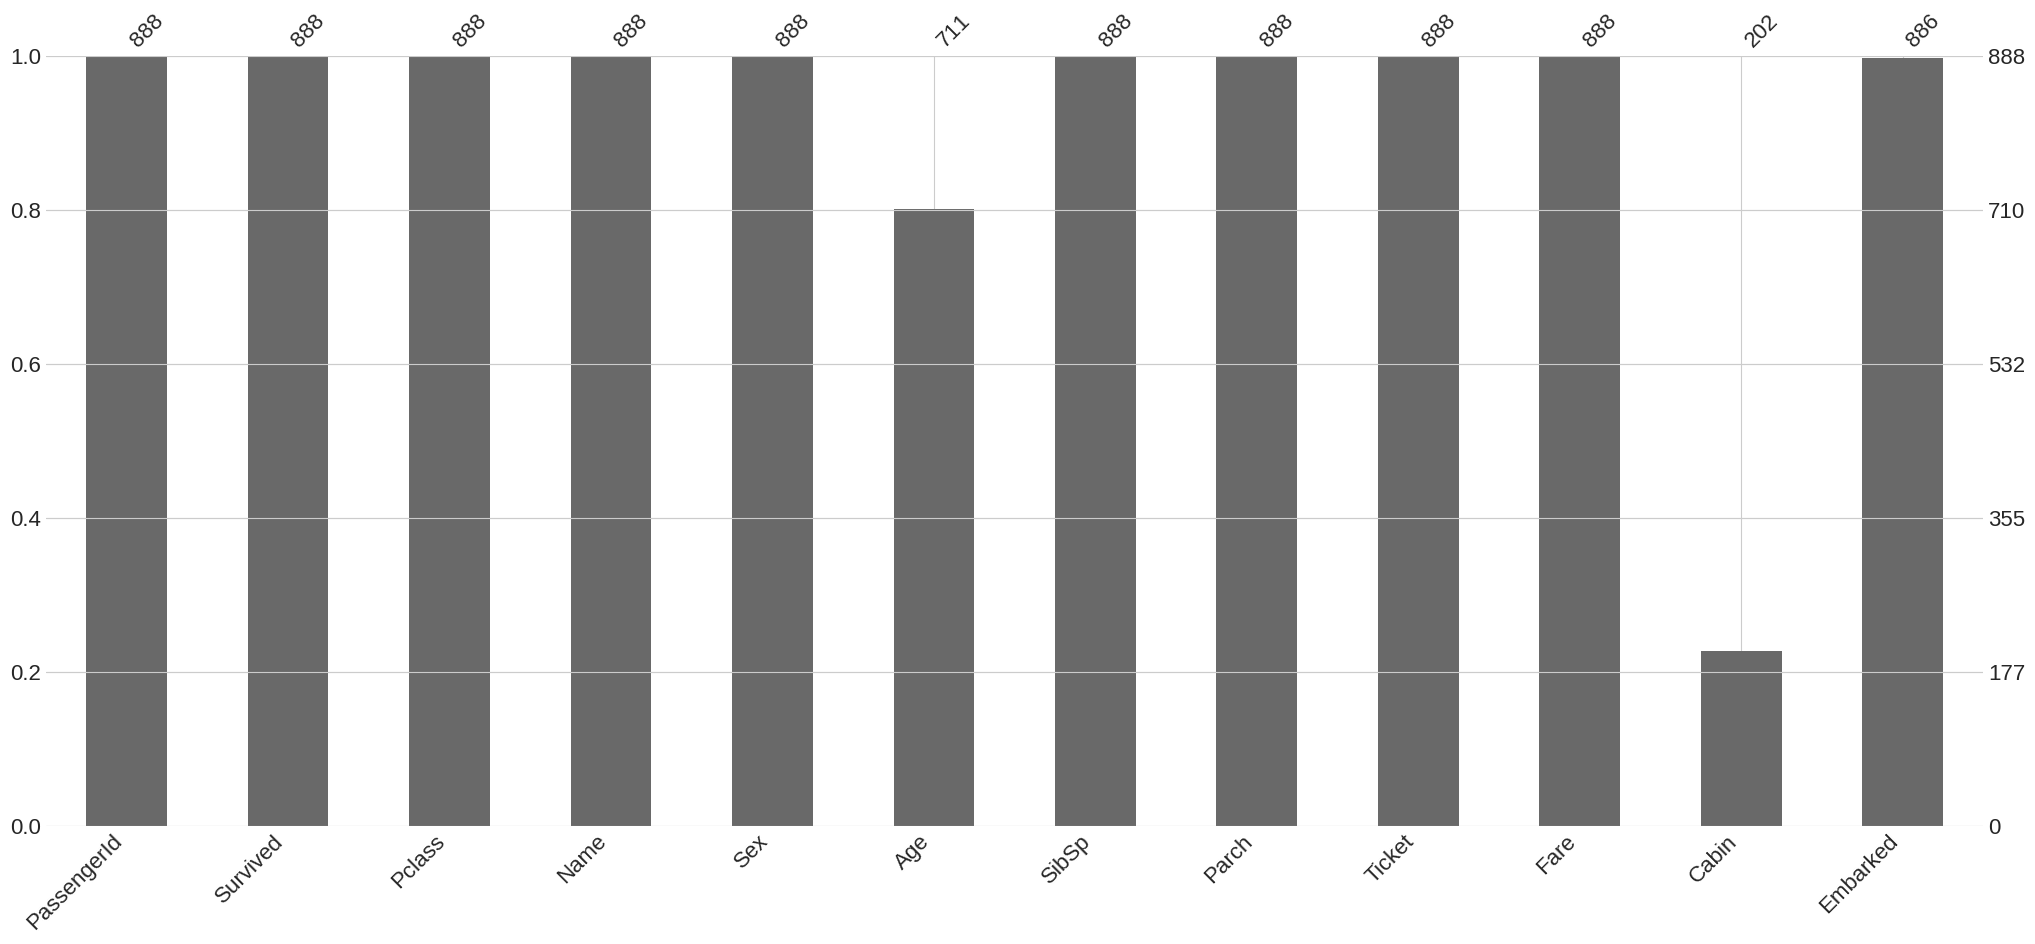

In [40]:
import missingno as msno
msno.bar(train_data)

As we can see there is an uneven amount of Nans for each data set.

## train_data = Age, cabin and embarked are important to fix the na's🚢
# test_data = Age, cabin and Fare are important to fix the na's🚢

In [41]:
#train data has 177 age nans
m = train_data['Age'].mean()
m

29.67534458509142

In [42]:
#test data has 86 age nans
m = test_data['Age'].mean()
m

30.272590361445783

In [43]:
train_data['Age'] = train_data['Age'].replace(np.nan, 29)
test_data['Age'] = test_data['Age'].replace(np.nan, 30)

In [44]:
#next is cabin
#Shows there is more than 60% of NA's for the column so we should drop it. Judging by .info()
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [45]:
#embarked on train data is only 2 nans
#embarked on test data is 0
train_data['Embarked'] = train_data['Embarked'].replace(np.nan, 'Q')

#Fare on train data is 0 nans
#Fare on test data is 1
#m = test_data['Fare'].mean()
#The mean obtained was 36 for the column 'Fare'
test_data['Fare'] = test_data['Fare'].replace(np.nan, 36.0)

## Lets check again for nan's🚢

In [46]:
#Check for na's
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
#Check for na's
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## feature engineer the 'name' column(not implemented in final, but a good way to learn of anything important)🚢

as its useful, also because we want to keep around the 10 variable mark.

Statistically we want a 1 predictor to 10 ratio (1 to ten)

We will keep the name column - progress this is because if you can group the families, that can help determine if they survive or not.

In [48]:
# create a new feature to extract title names from the Name column
#We can see that there are alot of extra names we dont need.
train_data['Title'] = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
train_data.Title.value_counts()

#-----------------Why are they getting the number of tittles of every passanger-------------------------------------------

Mr              515
Miss            181
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [49]:
test_data['Title'] = test_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_data.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

Furthermore we can map it like so to.. reduce the number of categories of names.

## thanks to https://medium.com/i-like-big-data-and-i-cannot-lie/how-i-scored-in-the-top-9-of-kaggles-titanic-machine-learning-challenge-243b5f45c8e9 for the extra help on the normalization of the name column.🚢

We know that the obvious names such as Mr,Miss,Mrs etc. can be their own categories.

In [50]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royal",
    "Don":        "Royal",
    "Sir" :       "Royal",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royal",
    "Dona":       "Royal",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royal"
}
# map the normalized titles to the current titles for train and test data.
train_data.Title = train_data.Title.map(normalized_titles)
test_data.Title = test_data.Title.map(normalized_titles)

We can see below that the outlier names are all gone now.

In [51]:
# view value counts for the normalized titles
test_data.Title.value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royal        1
Name: Title, dtype: int64

In [52]:
# view value counts for the normalized titles
train_data.Title.value_counts()

Mr         515
Miss       183
Mrs        127
Master      40
Officer     18
Royal        5
Name: Title, dtype: int64

## ENCODE CATEGORICAL VARIABLES🚢
sex, ticket and embarked and name.

## Start off with sex which has either male or female.🚢

Depending on the data we have, we might run into situations where, after label encoding, we might confuse our model into thinking that a column has data with some kind of order or hierarchy, when we clearly don’t have it. To avoid this, we ‘OneHotEncode’ that column. https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In order to one hot encode we must take in the label encode and use it as a parameter.

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#initialize label endoce as first step.
le = LabelEncoder()

train_data["Sex"] = le.fit_transform(train_data["Sex"].values)
test_data["Sex"] = le.fit_transform(test_data["Sex"].values)

## Second we focus on ticket🚢
ticket is an interesting one, as its an object with several nuances. Several categories, some with random conjunctions of letters and numbers


ticket type : A/5, PC, etc. Not every ticket has associated type
ticket number: starting from 0 to 3101317.
For most of the tickets first number is associated with Pclass, except tickets that are less than 5 digits long or tickets than have ticket type associated with them. There is not much additional information in ticket number, so it can be ommited

We are not too fussed about the ticket number so we can simply just get the ticket type such as a/5 and PC

In [54]:
# for now we drop ticket column
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

## Third we focus on embarked🚢
Simply its all categorical objects.

In [55]:
train_data["Embarked"].value_counts()

S    644
C    165
Q     79
Name: Embarked, dtype: int64

In [56]:
#label encode them
train_data["Embarked"] = le.fit_transform(train_data["Embarked"].values)
test_data["Embarked"] = le.fit_transform(test_data["Embarked"].values)

## lastly is Name🚢

In [57]:
train_data["Name"] = le.fit_transform(train_data["Name"].values)
test_data["Name"] = le.fit_transform(test_data["Name"].values)

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    int64  
 4   Sex          888 non-null    int64  
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Fare         888 non-null    float64
 9   Embarked     888 non-null    int64  
 10  Title        888 non-null    object 
dtypes: float64(2), int64(8), object(1)
memory usage: 83.2+ KB


In [59]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
 9   Title        418 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 32.8+ KB


In [60]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,108,1,22.0,1,0,7.2500,2,Mr
1,2,1,1,189,0,38.0,1,0,71.2833,0,Mrs
2,3,1,3,352,0,26.0,0,0,7.9250,2,Miss
3,4,1,1,271,0,35.0,1,0,53.1000,2,Mrs
4,5,0,3,15,1,35.0,0,0,8.0500,2,Mr


In [61]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,206,1,34.5,0,0,7.8292,1,Mr
1,893,3,403,0,47.0,1,0,7.0000,2,Mrs
2,894,2,269,1,62.0,0,0,9.6875,1,Mr
3,895,3,408,1,27.0,0,0,8.6625,2,Mr
4,896,3,178,0,22.0,1,1,12.2875,2,Mrs


## SCALE after split: next we use a scaler such as min max. Max-Min Normalization will be used as we will obtain smaller standard deviations.🚢

In [62]:
#With the power of google, many people say logistic regression is the best for titanic datasets.
#although lightgbm is more suited

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as gbm
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [63]:
#"PassengerId","Pclass",'Name',"Sex","Age","SibSp","Parch","Fare","Embarked"
#But due to feature importance  Passengerid,Name,Parch,Embarked have been removed

features = ["Pclass","Sex","Age","SibSp","Fare"]
X = train_data[features]
y = train_data['Survived']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.15)

#Last bit - encode labels
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## MODEL FITTING(with gridsearch) and finding useful variables using FEATURE IMPORTANCE🚢

### random forest(with gridsearch)🚢

In [64]:
pipelineone = Pipeline([('RandomForest', RandomForestClassifier())])

param_grid = {'RandomForest__max_features': ['auto'],
 'RandomForest__min_samples_leaf': [1, 2, 4],
 'RandomForest__min_samples_split': [2,3,4],
 'RandomForest__n_estimators': [100,200,300]}


#Gridsearch takes in param_grid, and pipeline.
model = GridSearchCV(pipelineone, param_grid, cv =None)
model.fit(X_train, y_train)

#submission
y_pred_sub = model.predict(test_data[features])

y_pred_random = model.predict(X_test)
forest = accuracy_score(y_test, y_pred_random)
print(forest)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

0.835820895522388


### random forest feature importance🚢

higher means better and more important

"PassengerId","Pclass",'Name',"Sex","Age","SibSp","Parch","Fare","Embarked"

the weakest/less important columns are Passengerid,Name,SibSp,Parch,Embarked. They were removed as a result.

## logistic regression(with gridsearch)🚢

In [65]:
#[0.001, 0.01, 0.1, 1, 10, 100, 1000]
pipelinetwo = Pipeline([('logisticregression', LogisticRegression(max_iter=100))])
param_grid = {'logisticregression__penalty' : ['l2'],
              'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'logisticregression__solver' : ['liblinear']}

#Gridsearch takes in param_grid, and pipeline.
model = GridSearchCV(pipelinetwo, param_grid, cv =None)
model.fit(X_train, y_train)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
logistic = accuracy_score(y_test, y_pred)
print(logistic)

0.7910447761194029


## logistic regression feature importance🚢

"PassengerId","Pclass",'Name',"Sex","Age","SibSp","Parch","Fare","Embarked"

Large positive values of w_j signify higher importance of the jth feature in the prediction of positive class. Large negative values signify higher importance in the prediction of negative class.

We can see that the less significant columns are "PassengerId", "Name", "Parch","Fare","Embarked"

Feature: 0, Score: -2.12669
Feature: 1, Score: -2.52304
Feature: 2, Score: -2.14824
Feature: 3, Score: -1.59586
Feature: 4, Score: -0.01186


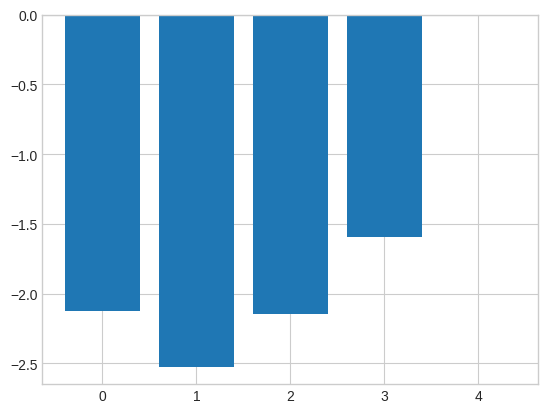

In [66]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## XGBOOST🚢

In [67]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
XGB = accuracy_score(y_test, y_pred)
print(XGB)

0.835820895522388


## KNeighborsClassifier🚢

In [68]:
KN = KNeighborsClassifier(n_neighbors=3)
KN.fit(X_train, y_train)
y_pred = KN.predict(X_test)
knn = accuracy_score(y_test, y_pred)
print(knn)

0.8582089552238806


## SVC🚢

In [69]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
SVC = accuracy_score(y_test, y_pred)
print(SVC)

0.8134328358208955


## Linear SVC🚢

In [70]:
lsvc = LinearSVC(random_state=0)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
LSVC = accuracy_score(y_test, y_pred)
print(LSVC)

0.7985074626865671


In [71]:
finalleaderboard = {
  "Random Forest": forest,
  "logistic regression": logistic,
  "XGB": XGB,
  "KNeighborsClassifier": knn,
  "SVC": SVC,
  "Linear SVC": LSVC
}

finalleaderboard = pd.DataFrame.from_dict(finalleaderboard, orient='index', columns=['Accuracy'])
print(finalleaderboard)

                      Accuracy
Random Forest         0.835821
logistic regression   0.791045
XGB                   0.835821
KNeighborsClassifier  0.858209
SVC                   0.813433
Linear SVC            0.798507


In [72]:
len(y_pred_random)

134

In [73]:

#Code required to submit for competition
#There must be 418  test rows - test_data must be 418
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_sub})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [74]:
test_data.PassengerId.shape, y_pred_sub.shape

((418,), (418,))

In [75]:
print(np.count_nonzero(y_pred))
#conclusion:
#This many survived.

52


# Extra step: Adding a lazy classifier to better understand other models🚢

https://pypi.org/project/lazypredict/

# major lessons learned:🚢

The overall score went down when removing columns, so it was better to impute them with the means of each column to get a higher score. If i did that then the score would skyrocket probably past my highest score ever of 78%.
But it was the right call to disable the rows that had major Nans like above 60% of their columns.

Feature importance narrowed the columns "PassengerId","Pclass",'Name',"Sex","Age","SibSp","Parch","Fare","Embarked" down to just ["Pclass","Sex","Age","SibSp","Fare"]. This was because the other columns were removed due to their smaller significance in each model. This was done through the random forest and logistic regression feature importance code.

Regression analysis wise, there was a huge KNeighborsClassifier, random forest and XBG outperformed the rest. It was interesting as logistic regression was considered to be the top model for this data set.


##Bibliografia


*   Titanic - machine learning from disaster. (s/f). Kaggle.com. Recuperado el 19 de febrero de 2024, de https://www.kaggle.com/competitions/titanic/data


*   Discretization methods (data mining). (s/f). Microsoft.com. Recuperado el 19 de febrero de 2024, de https://learn.microsoft.com/en-us/analysis-services/data-mining/discretization-methods-data-mining?view=asallproducts-allversions

*   Adio, F. (2022, julio 21). Data cleaning process: How should it look like? Neptune.Ai. https://neptune.ai/blog/data-cleaning-process
https://neptune.ai/blog/data-cleaning-process#:~:text=but%20if%20you%20encode%20small%20as%201%2C,our%20business%20in%20data%20cleaning%20and%20preprocessing.


*   Tamboli, N. (2021, octubre 29). Effective strategies for handling missing values in data analysis (updated 2023). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

* AnalystHub. (2023, septiembre 11). The Z-Score Method: brushing out outliers from your dataset. The Pythoneers. https://medium.com/pythoneers/brushing-out-outliers-from-your-dataset-the-z-score-method-f46dd58e5091

* Biswal, A. (2021, julio 28). Percentile in statistics: Overview & how to calculate. Simplilearn.com; Simplilearn. https://www.simplilearn.com/tutorials/data-analytics-tutorial/percentile-in-statistics

* Goyal, C. (2021, mayo 19). Outlier detection & removal. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
* Hargrave, M. (2003, noviembre 26). Standard Deviation Formula and Uses vs. Variance. Investopedia. https://www.investopedia.com/terms/s/standarddeviation.asp

* Chaudhary, S. (2019, septiembre 28). Why “1.5” in IQR method of outlier detection? Towards Data Science. https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097


*  Amaya, A., & Cruz, J. (2023). INTRODUCTION TO MACHINE LEARNING. Google.com. Recuperado el 26 de febrero de 2024, de https://colab.research.google.com/drive/1r8-GCLSPl2CiLzS99cSDmwxhhMRtJXDq?authuser=2






**Respositorio**

https://drive.google.com/file/d/1DtTnjxp5HlQKcHya93Tlq2kQXPeB69PP/view?usp=sharing descarga de datos gender_submission.csv

https://drive.google.com/file/d/1UW33EPPAWlcOime2BCdiCspK2Y5b7hqE/view?usp=sharing descarga de datos train.csv

https://drive.google.com/file/d/17JKlAaC64jfBk4Pt1FlbvhcBwHqO33PL/view?usp=sharing descarga de datos test.cvs